<a href="https://colab.research.google.com/github/RCaminero/artificial-lntelligence/blob/main/House_Sales_practicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               800       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010

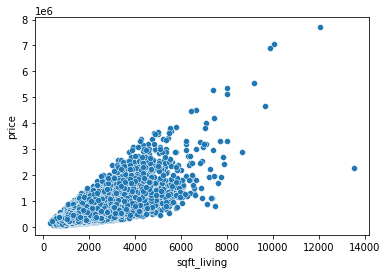

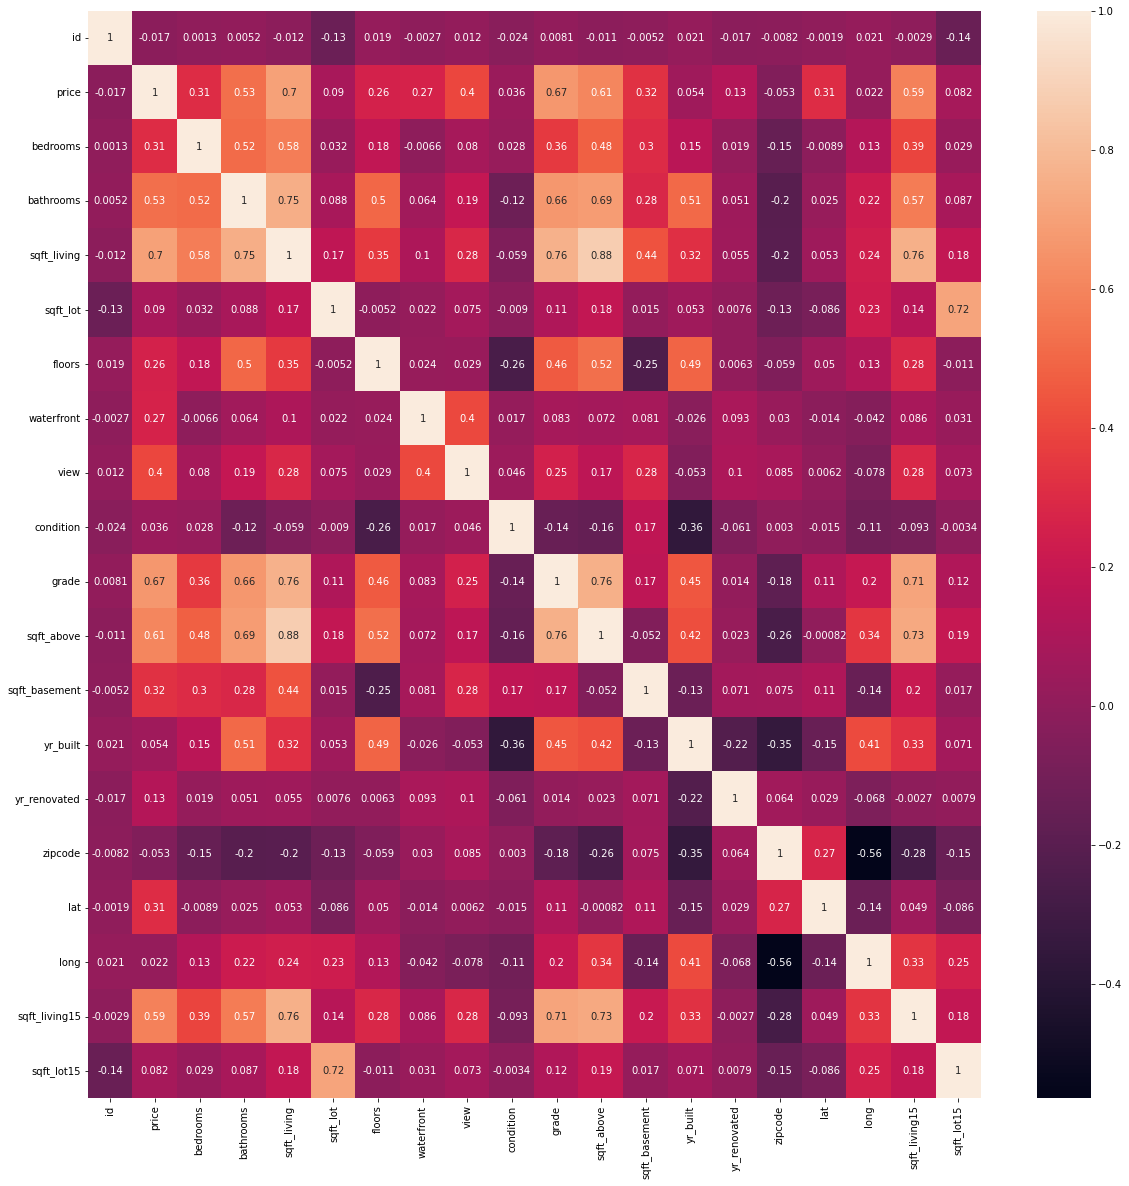

In [ ]:
import tensorflow as tf #para crear un modelo de machine learning
import pandas as pd # para leer el archivo que contiene los datos
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # es una biblioteca de aprendizaje automático de software libre 
#para la visualización de gráficos
import seaborn as sns 
import matplotlib.pyplot as plt

#Creando set datos
house_df = pd.read_csv("/content/data.csv")

# sqft_living | price
#visualizacion de datos
sns.scatterplot( x = 'sqft_living', y = 'price', data = house_df)

#correlacion
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot=True)
#bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

#trabajando con los datos generados
x = house_df[selected_features]
y = house_df['price']

# transformar las caracteristicas y escalar a rangos 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#Normalizando la salida
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)


#entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size = 0.25)

# Definiendo modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation = 'relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1, activation = 'linear'))

model.summary()

#Indicamos el modelo a compilar y el manejo estadistic de error
model.compile(optimizer= 'Adam', loss = 'mean_squared_error')

# Entrenamiento
epochs_hits = model.fit(x_train, y_train, epochs= 100, batch_size= 50, validation_split= 0.2)



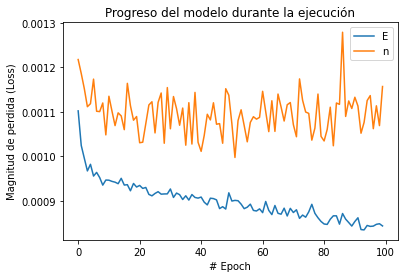

In [ ]:
# Evaluando Modelo
epochs_hits.history.keys()

#Grafico de entrenamiento de modelo
plt.plot(epochs_hits.history['loss'])
plt.plot(epochs_hits.history['val_loss'])
plt.title('Progreso del modelo durante la ejecución')
plt.xlabel('# Epoch')
plt.ylabel('Magnitud de perdida (Loss)')
plt.legend('Entrenamiento del Modelo')

In [ ]:
#bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement
x_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

scaler_1 = MinMaxScaler()
x_test_scaled_1 = scaler_1.fit_transform(x_test_1)

# Trabajando con la prediccion
y_predict_1 = model.predict(x_test_scaled_1)
#print(y_predict_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
print(f"El valor estimado de una casa con las carateristicas indicadas es {y_predict_1}")


El valor estimado de una casa con las carateristicas indicas es [[181070.66]]
